# <center>CHOOSING PRIOR</center>
- Việc chọn prior không nên chọn 1 giá trị, mà chọn 1 phân phối.  
~Bạn không cần thu thập data nếu bạn tin chắc điều đó sẽ xảy ra hoặc không xảy ra.
- Chọn prior sao cho data bạn thu thập nằm trong khoảng 95% của phân phối sẽ chọn làm prior.  
~Chúng ta sẽ dùng predictive distribution để tìm khoảng 95% này
- Để thuận tiện cho việc tính toán, ta thường chọn [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior)  
Conjugate distributions là family những distributions mà có prior giống như posterior.  
Conjugate prior là prior cho likelihood.  
Ví dụ:  
    - beta posterior $\propto$ bernoulli/binomial likelihood $\times$ beta prior
    - norm $\propto$ norm $\times$ norm  
    - gamma $\propto$ exponential $\times$ gamma


---
# Prior predictive distribution
$ \text{Prior} = f(\theta) $  
$ f(x) = \int f(x|\theta)f(\theta)d\theta$  
Giả sử prior là uniform, PDF là binom(10, $\theta$)  
prior predictive distribution là function xem x là biến, ngược với likelihood xem theta là biến.  
$ f(x) = \int_0^1 C^{10}_x \theta^x (1-\theta)^{10-x} dx$  
$ = \int_0^1 \frac{\Gamma(11)}{\Gamma(x+1)\Gamma(11-x)}\theta^{(x+1)-1}(1-\theta)^{11-x-1}d\theta $  
$ = \frac{\Gamma(11)}{\Gamma(12)} \int_0^1 \frac{\Gamma(12)}{\Gamma(x+1)\Gamma(11-x)}\theta^{(x+1)-1}(1-\theta)^{11-x-1}d\theta $  
$ = \frac{\Gamma(11)}{\Gamma(12)} \int_0^1(\text{PDF Beta}(\alpha=x+1; \beta=11-x)) $  
$ = \frac{\Gamma(11)}{\Gamma(12)} = \frac{1}{11}$  

Nghĩa là với xác suất là đều nhau với mọi theta, thì xác suất ra 0,1,.. hoặc 10 heads là bằng nhau

# Posterior predictive distribution
Tương tự như prior predictive.  
= PDF x posterior  
$ f(x|\text{data}) = \int f(x|\theta) f(\theta|\text{data}) d\theta $  
Ví dụ:  
Bernoulli có **data = [1]**  
=> posterior $f(\theta|\text{data}) = 2\theta I_{\{0 \leq x \leq 1 \}} $ (bài trước)  
posterior predictive distribution.  
$ f(x) = \int_0^1 \theta^x (1-\theta)^{1-x} 2\theta d\theta $  
Để ra head next: $ f(x=1) = \int_0^1 2\theta^2d\theta = \frac{2}{3} $  
Để ra tail next: $ f(x=0) = \int_0^1 2\theta(1-\theta) d\theta = \frac{1}{3} $

---
# Beta $\propto$ Bernoulli/binomial $\times$ beta
<center>Beta($\alpha$ + k, $\beta$ +n-k) $\propto$ Bernoulli/binomial(n,k) $\times$ beta($\alpha$, $\beta$)</center>

Prior
- Trong ví dụ đồng xu thì $\alpha$ là số lần ra head + 1, $\beta$ là số lần ra tail + 1.
- Uniform là beta(1,1), tức là 0 head, 0 tail.

Likelihood
- chính là data 
- dành cho dữ liệu proportion
- binom khác bernoulli ở chỗ $C^n_k$, đây chỉ là 1 constant, sẽ được nằm trong constant của posterior beta

Posterior
- $\alpha$ thêm số lần ra head, $\beta$ thêm số lần ra tail

Hyperparameters
- $\alpha$, $\beta$ được gọi là hyperparameter cho p ( ví dụ là p(head) của đồng xu)

Effective sample size
- Mean của beta prior là $\frac{\alpha}{\alpha + \beta} $
- Effective sample size của beta prior là $\alpha + \beta $
- Mean của beta posterior là $\frac{\alpha + k }{\alpha + \beta + n}  = \frac{\alpha + \beta}{\alpha + \beta + n}\frac{\alpha}{\alpha + \beta}+\frac{n}{\alpha + \beta + n}\frac{k}{n} $   
Mean của beta posterior = prior weight x prior mean + sample weight x sample mean. 
    - $\alpha + \beta$ là effective sample size
    - n là data sample size.  
Khi n >> $\alpha + \beta$ thì posterior ít bị ảnh hưởng bởi prior.

In [1]:
# Một xét nghiệm chẩn đoán mới đang nghiên cứu dùng theta là tỉ lệ thất bại trong việc chẩn đoán xác định.
# Xét nghiệm này khá đắt, và số tiền được hỗ trợ nghiên cứu chỉ được thử nghiệm trong 20 ca đã có cđxđ.
# Gọi X là số ca xét nghiệm thất bại
# Thông thường, một xét nghiệm mới thì đúng 1 ca, sai 1 ca. Prior là beta(2,2)
# Mean = a/(a+b) = 2
# Effective sample size = a+b = 4
# Data là 6 ca thất bại, 14 ca chẩn đoán đúng.

import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

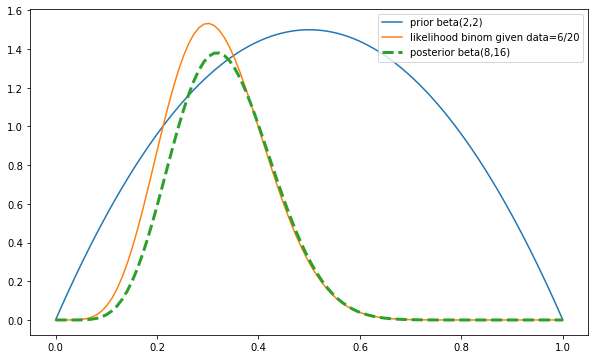

In [2]:
# Posterior là beta(a+k, b+n-k) = beta(8,16)

arr = np.linspace(0,1,100)
plt.figure(figsize=(10,6))
plt.plot(arr, st.beta(2,2).pdf(arr), label="prior beta(2,2)")
plt.plot(arr, st.binom(n=20, p=arr).pmf(6)*8, label="likelihood binom given data=6/20")
plt.plot(arr, st.beta(8,16).pdf(arr)/3, label="posterior beta(8,16)",linestyle="--", linewidth="3")
plt.legend(loc=1);

In [3]:
# khoảng Credible interval 95%
st.beta(8,16).interval(0.95)

(0.16376359837494986, 0.5291916660085065)

In [4]:
# sếp nói nếu bạn chắc rằng là tỉ lệ thất bại theta < 0.35 với xác suất 90%,
# thì xét nghiệm mới được thông qua bước kiểm tiếp theo
# Theo bạn, theta < 0.35 với xác suất là bao nhiêu? Có qua được ải này không?
st.beta(8,16).cdf(0.35)

0.5864310314450809

In [5]:
# Bạn được hỗ trợ chi phí thêm 5 lần test nữa
# Đợt này, không test nào thất bại trong việc chẩn đoán đúng
# Theo bạn, với điều kiện như trên, test được thông qua không?
st.beta(8,16+5).cdf(0.35)

0.8179064455690616

---
# Gamma $\propto$ Poisson $\times$ Gamma

Nhắc lại:  
- Poisson($\lambda$) thường dùng để phân phối số đếm
- $\lambda$ là rate parameter, $= \frac{k}{n}$  
- Với likelihood Poisson($\lambda$) thì nó = Gamma($\lambda +1$, 1)

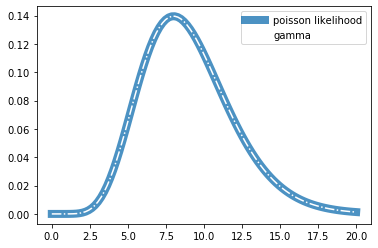

In [6]:
arr = np.linspace(0,20,100)
plt.plot(arr, st.poisson(arr).pmf(8), label="poisson likelihood", linewidth=8, alpha=0.8)
plt.plot(arr, st.gamma(9,scale=1).pdf(arr), label="gamma", linestyle="-.", color="white")
plt.legend();

<center>Beta($\alpha+k,\beta+n$) $\propto$ Poisson($\lambda = \frac{k}{n}$) $\times$ Beta($\alpha,\beta$)</center>

- $\alpha, \beta$ là hyperparameters của $\lambda$  
- Mean của Beta là $\alpha/\beta$
- Variance của Beta là $\alpha/\beta^2$

Mean của posterior beta = $\frac{\alpha+k}{\beta+n}$ = $\frac{\beta}{\beta+n}\frac{\alpha}{\beta} + \frac{n}{\beta+n}\frac{k}{n}$ = prior weight x prior mean + data weight + data mean  
Trong đó:
- $\beta$ là effective sample size
- n là data size

Có 2 cách chọn $\alpha, \beta$ cho prior:
1. Chọn prior mean $\frac{\alpha}{\beta}$ = $\lambda$ từng biết ( your belief).  
    - Chọn thêm variance = $\alpha/\beta^2$, sau đó tính $\alpha$ và $\beta$.  
    - Hoặc dùng standard deviation = $\sqrt{\alpha}/\beta$, tính $\alpha$ và $\beta$.  
    - Hoặc chọn effective sample size là $\beta$, rồi tính $\alpha$.  
2. Chọn đại một số $\epsilon$ rất nhỏ 
    - prior = Gamma($\epsilon$, $\epsilon$)
    - $\frac{\alpha+\epsilon}{\beta+\epsilon} \approx \frac{\alpha}{\beta}$ vì $\epsilon$ không đáng kể
    - Còn gọi là vague prior

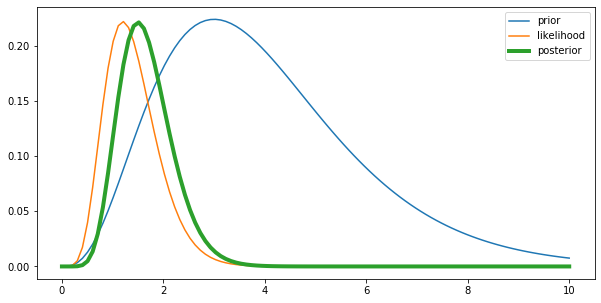

In [9]:
# xuất huyết não 4 ca/tuần
# chọn prior gamma(a,b) với mean=4, sample size=1
# a/b =4; b =1 => prior Gamma(4 ,1)

# cho data như sau
data = [1,2,2,0,1]
k = sum(data)
n = len(data)

# Vậy posterior = Gamma(4+k, 1+n)

plt.figure(figsize=(10,5))
arr = np.linspace(0, 10 , 100)
plt.plot(arr, st.gamma(4,scale=1).pdf(arr), label="prior")
plt.plot(arr, arr**k * np.exp(-n*arr)*30, label="likelihood")
plt.plot(arr, st.gamma(4+k,scale=1/(1+n)).pdf(arr)*0.28, label="posterior", linewidth=4)
plt.legend();

In [8]:
# khoảng CI 95% posterior
st.gamma(4+k,scale=1/(1+n)).interval(.95)

(0.7992314493554056, 2.8474672419031943)